## Wavelet

Look at individual wavelets as generated by kymatio. Where would we make an equivalent "circular harmonic"?

In [11]:
from kymatio.scattering2d import filter_bank
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def gabor_2d(M, N, sigma, theta, xi, slant=1.0, offset=0):
    """
        Computes a 2D Gabor filter.
        A Gabor filter is defined by the following formula in space:
        psi(u) = g_{sigma}(u) e^(i xi^T u)
        where g_{sigma} is a Gaussian envelope and xi is a frequency.
        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, 1])
        theta : float
            angle in [0, pi]
        slant : float, optional
            parameter which guides the elipsoidal shape of the morlet
        offset : int, optional
            offset by which the signal starts
        Returns
        -------
        morlet_fft : ndarray
            numpy array of size (M, N)
    """
    gab = np.zeros((M, N), np.complex64)
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]], np.float32)
    R_inv = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]], np.float32)
    D = np.array([[1, 0], [0, slant * slant]])
    curv = np.dot(R, np.dot(D, R_inv)) / ( 2 * sigma * sigma)


    for ex in [-2, -1, 0, 1, 2]:
        for ey in [-2, -1, 0, 1, 2]:
            [xx, yy] = np.mgrid[offset + ex * M:offset + M + ex * M, offset + ey * N:offset + N + ey * N]
            arg = -(curv[0, 0] * np.multiply(xx, xx) + (curv[0, 1] + curv[1, 0]) * np.multiply(xx, yy) + curv[
                1, 1] * np.multiply(yy, yy)) + 1.j * (xx * xi * np.cos(theta) + yy * xi * np.sin(theta))
            gab += np.exp(arg)
    '''

    ex=0
    ey=0
    [xx, yy] = np.mgrid[offset + ex * M:offset + M + ex * M, offset + ey * N:offset + N + ey * N]
    arg = -(curv[0, 0] * np.multiply(xx, xx) + (curv[0, 1] + curv[1, 0]) * np.multiply(xx, yy) + curv[
        1, 1] * np.multiply(yy, yy)) + 1.j * (xx * xi * np.cos(theta) + yy * xi * np.sin(theta))
    gab += np.exp(arg)

    '''
    norm_factor = (2 * 3.1415 * sigma * sigma / slant)
    gab /= norm_factor

    return gab

In [27]:
def morlet_2d(M, N, sigma, theta, xi, slant=0.5, offset=0):
    """
        Computes a 2D Morlet filter.
        A Morlet filter is the sum of a Gabor filter and a low-pass filter
        to ensure that the sum has exactly zero mean in the temporal domain.
        It is defined by the following formula in space:
        psi(u) = g_{sigma}(u) (e^(i xi^T u) - beta)
        where g_{sigma} is a Gaussian envelope, xi is a frequency and beta is
        the cancelling parameter.
        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, 1])
        theta : float
            angle in [0, pi]
        slant : float, optional
            parameter which guides the elipsoidal shape of the morlet
        offset : int, optional
            offset by which the signal starts
        Returns
        -------
        morlet_fft : ndarray
            numpy array of size (M, N)
    """
    wv = gabor_2d(M, N, sigma, theta, xi, slant, offset)
    wv_modulus = gabor_2d(M, N, sigma, theta, 0, slant, offset)
    K = np.sum(wv) / np.sum(wv_modulus)

    mor = wv - K * wv_modulus
    return mor

In [37]:
test_wavelet=gabor_2d(25,25,1.5,0,3.142*(3/2),0.5)

In [38]:
len(test_wavelet)

25

In [39]:
test_wavelet.shape

(25, 25)

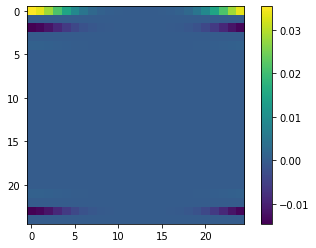

In [40]:
plt.imshow(test_wavelet.real)
plt.colorbar()

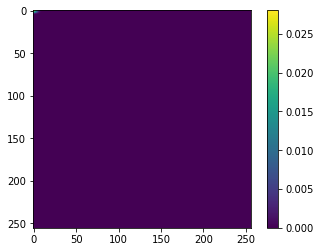

In [25]:
plt.imshow(ntest_wavelet))
plt.colorbar()

In [ ]:
## Can I just create one of these? Do I need the top model too, or hybrid model?
scatteringBase = baseModelFactory( #creat scattering base model
    architecture='scattering',
    J=2,
    N=256,
    M=256,
    second_order=True,
    initialization="Random",
    seed=123,
    learnable=False,
    lr_orientation=0.1,
    lr_scattering=0.1,
    filter_video=False,
    device="cpu",
    use_cuda=False
)

In [ ]:
scatteringBase.n_coefficients

In [ ]:
scatteringBase.params_filters

In [ ]:
scatteringBase.forward

In [ ]:
top = topModelFactory( #create cnn, mlp, linearlayer, or other
    base=scatteringBase,
    architecture="cnn",
    num_classes=6, 
    width=8, 
    use_cuda=False
)

    

In [ ]:
hybridModel = sn_HybridModel(scatteringBase=scatteringBase, top=top, use_cuda=False) #creat hybrid model

In [ ]:
def morlet_2d(M, N, sigma, theta, xi, slant=0.5, offset=0):
    """
        Computes a 2D Morlet filter.
        A Morlet filter is the sum of a Gabor filter and a low-pass filter
        to ensure that the sum has exactly zero mean in the temporal domain.
        It is defined by the following formula in space:
        psi(u) = g_{sigma}(u) (e^(i xi^T u) - beta)
        where g_{sigma} is a Gaussian envelope, xi is a frequency and beta is
        the cancelling parameter.
        Parameters
        ----------
        M, N : int
            spatial sizes
        sigma : float
            bandwidth parameter
        xi : float
            central frequency (in [0, 1])
        theta : float
            angle in [0, pi]
        slant : float, optional
            parameter which guides the elipsoidal shape of the morlet
        offset : int, optional
            offset by which the signal starts
        Returns
        -------
        morlet_fft : ndarray
            numpy array of size (M, N)
    """
    wv = gabor_2d(M, N, sigma, theta, xi, slant, offset)
    wv_modulus = gabor_2d(M, N, sigma, theta, 0, slant, offset)
    K = np.sum(wv) / np.sum(wv_modulus)

    mor = wv - K * wv_modulus
    return mor